<a href="https://colab.research.google.com/github/djdtimit/Deep-Learning/blob/master/Classifying_movie_reviews_(IMDB)_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying movie reviews (IMDB): binary classification

classify movie reviews as
positive or negative, based on the text content of the reviews

In [0]:
from keras.datasets import imdb

In [0]:
# keep only the 10000 most frequent occuring words
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words=10000)

In [54]:
train_data.ndim

1

In [55]:
train_data.shape

(25000,)

In [56]:
# list of word indices
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [58]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [59]:
print(train_labels)

[1 0 0 ... 0 1 0]


In [60]:
test_data.shape

(25000,)

## balanced dataset

In [61]:
 len([label for label in train_labels if label == 1])

12500

In [62]:
 len([label for label in train_labels if label == 0])

12500

## Preparing the data

### one-hot encoding

In [0]:
import numpy as np

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  one_hot_matrix = np.zeros((len(sequences), dimension))
  
  for i, sequence in enumerate(sequences):
    one_hot_matrix[i, sequence] = 1.0
    
  return one_hot_matrix

In [0]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [66]:
X_train.shape

(25000, 10000)

### vectorizing of labels

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [68]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## Building the network

input data is vectors, and the labels are scalars (1s and 0s): simple stack of fully connected (Dense) layers with relu activations performs well on such a problem

sigmoid returns probability of label equal to 1

In [0]:
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### Configuring the optimizer

In [0]:
from keras import optimizers

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

### using custom losses and metrics

In [0]:
from keras import losses, metrics

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr = 0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

## Validation

In [0]:
X_val = X_train[:10000]
X_partial_train = X_train[10000:]
y_val = y_train[:10000]
y_partial_train = y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
history = model.fit(X_partial_train, y_partial_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.5280 - acc: 0.7782 - val_loss: 0.4108 - val_acc: 0.8532
Epoch 2/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.3216 - acc: 0.8977 - val_loss: 0.3304 - val_acc: 0.8750
Epoch 3/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.2323 - acc: 0.9263 - val_loss: 0.3049 - val_acc: 0.8761
Epoch 4/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1821 - acc: 0.9407 - val_loss: 0.2784 - val_acc: 0.8898
Epoch 5/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1461 - acc: 0.9560 - val_loss: 0.2767 - val_acc: 0.8900
Epoch 6/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1178 - acc: 0.9641 - val_loss: 0.3234 - val_acc: 0.8733
Epoch 7/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.0962 - acc: 0.9727 - val_loss: 0.3052 - 

## Plotting

In [0]:
history_dict = history.history

In [80]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

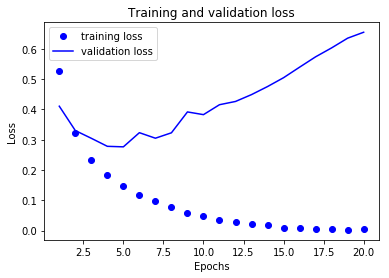

In [82]:
val_loss = history_dict['val_loss']
train_loss = history_dict['loss']

epochs = range(1, len(val_loss)+1)
plt.plot(epochs, train_loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

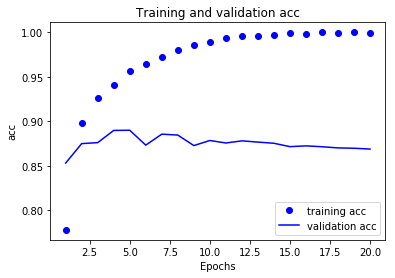

In [83]:
val_acc = history_dict['val_acc']
train_acc = history_dict['acc']

epochs = range(1, len(val_acc)+1)
plt.plot(epochs, train_acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [84]:
val_acc

[0.8531999999046326,
 0.8750000004768371,
 0.8761000002861022,
 0.8898000003814698,
 0.8900000003814698,
 0.8733000001907348,
 0.8856,
 0.8846000000953674,
 0.8727999998092651,
 0.8785,
 0.8757000001907349,
 0.8781000002861022,
 0.8766999999046325,
 0.8753999999046326,
 0.8716,
 0.8724999999046326,
 0.8714999999046326,
 0.8701999997138977,
 0.8697999999046325,
 0.8688999998092651]

best val_acc after 4 epochs -> retrain

## Retraining

In [85]:
model.fit(x=X_train, y=y_train, batch_size=512,epochs=4)

Epoch 1/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.2163 - acc: 0.9463
Epoch 2/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.1226 - acc: 0.9639
Epoch 3/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.0893 - acc: 0.9734
Epoch 4/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.0642 - acc: 0.9822


In [86]:
results = model.evaluate(X_test, y_test)

25000/25000 [==============================] - 2s 80us/step


In [87]:
results

[0.4949550302553177, 0.8598]

In [88]:
model.metrics_names

['loss', 'acc']

## Prediction

In [89]:
model.predict(X_test)

array([[0.01844221],
       [1.        ],
       [0.9238348 ],
       ...,
       [0.04118869],
       [0.07572913],
       [0.81525993]], dtype=float32)

## Further experiments

### One hidden layer

In [0]:
model = models.Sequential()
model.add(layer=layers.Dense(units=16, activation='relu',input_shape=(10000,)))
model.add(layer=layers.Dense(units=1,activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss ='binary_crossentropy', metrics=['accuracy'])

In [92]:
history = model.fit(x=X_partial_train, y=y_partial_train, batch_size=512,epochs=20,validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.4899 - acc: 0.7972 - val_loss: 0.3979 - val_acc: 0.8469
Epoch 2/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.3049 - acc: 0.9065 - val_loss: 0.3147 - val_acc: 0.8848
Epoch 3/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.2376 - acc: 0.9258 - val_loss: 0.2924 - val_acc: 0.8866
Epoch 4/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1951 - acc: 0.9399 - val_loss: 0.2791 - val_acc: 0.8885
Epoch 5/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1660 - acc: 0.9501 - val_loss: 0.2738 - val_acc: 0.8900
Epoch 6/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1427 - acc: 0.9593 - val_loss: 0.2990 - val_acc: 0.8790
Epoch 7/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1249 - acc: 0.9652 - val_loss: 0.2814 - 

In [0]:
history_dict = history.history

In [94]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [95]:
history_dict['val_acc']

[0.846900000667572,
 0.8848,
 0.8866000007629394,
 0.8885000003814697,
 0.8900000003814698,
 0.879,
 0.8879000001907349,
 0.8851,
 0.8847000001907349,
 0.8838000001907349,
 0.8788000000953674,
 0.8808000000953674,
 0.8766000000953674,
 0.8779000001907349,
 0.8748000000953674,
 0.8751999999046326,
 0.8727999999046325,
 0.8731999996185302,
 0.8614999998092652,
 0.8702999998092651]

In [96]:
model.fit(x=X_train, y=y_train, batch_size=512, epochs=4)

Epoch 1/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.1953 - acc: 0.9464
Epoch 2/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.1434 - acc: 0.9570
Epoch 3/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.1188 - acc: 0.9640
Epoch 4/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.1023 - acc: 0.9697


In [97]:
model.evaluate(x=X_test, y=y_test)

25000/25000 [==============================] - 2s 80us/step


[0.461113265209198, 0.8568]

acc not as good as in the two hidden layer case

### three hidden layer

In [0]:
model = models.Sequential()
model.add(layer=layers.Dense(units=16, activation='relu',input_shape=(10000,)))
model.add(layer=layers.Dense(units=16,activation='relu'))
model.add(layer=layers.Dense(units=16,activation='relu'))
model.add(layer=layers.Dense(units=16,activation='relu'))
model.add(layer=layers.Dense(units=1,activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
history = model.fit(x=X_partial_train, y=y_partial_train, batch_size=512, epochs=20,validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.5715 - acc: 0.7637 - val_loss: 0.4318 - val_acc: 0.8648
Epoch 2/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.3353 - acc: 0.8965 - val_loss: 0.3240 - val_acc: 0.8787
Epoch 3/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.2326 - acc: 0.9225 - val_loss: 0.3125 - val_acc: 0.8769
Epoch 4/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1739 - acc: 0.9431 - val_loss: 0.2960 - val_acc: 0.8805
Epoch 5/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1425 - acc: 0.9537 - val_loss: 0.2894 - val_acc: 0.8853
Epoch 6/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1116 - acc: 0.9655 - val_loss: 0.3296 - val_acc: 0.8795
Epoch 7/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.0985 - acc: 0.9683 - val_loss: 0.3262 - 

In [103]:
model.fit(x=X_train, y=y_train, batch_size=512,epochs=5)

Epoch 1/5
25000/25000 [==============================] - 2s 65us/step - loss: 0.2559 - acc: 0.9454
Epoch 2/5
25000/25000 [==============================] - 2s 66us/step - loss: 0.1348 - acc: 0.9621
Epoch 3/5
25000/25000 [==============================] - 2s 65us/step - loss: 0.1045 - acc: 0.9700
Epoch 4/5
25000/25000 [==============================] - 2s 66us/step - loss: 0.0841 - acc: 0.9758
Epoch 5/5
25000/25000 [==============================] - 2s 66us/step - loss: 0.0664 - acc: 0.9821


In [104]:
results = model.evaluate(x=X_test, y=y_test)

25000/25000 [==============================] - 2s 84us/step


In [105]:
results

[0.5172021146202087, 0.85924]

### 32 hidden units

In [0]:
model = models.Sequential()
model.add(layer=layers.Dense(units=32,activation='relu', input_shape=(10000,)))
model.add(layer=layers.Dense(units=32,activation='relu'))
model.add(layer=layers.Dense(units=32,activation='relu'))
model.add(layer=layers.Dense(units=1,activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [109]:
model.fit(x=X_partial_train, y=y_partial_train,batch_size=512,epochs=20,validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.4924 - acc: 0.7803 - val_loss: 0.3440 - val_acc: 0.8694
Epoch 2/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.2684 - acc: 0.9030 - val_loss: 0.3559 - val_acc: 0.8491
Epoch 3/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1897 - acc: 0.9315 - val_loss: 0.3297 - val_acc: 0.8691
Epoch 4/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1517 - acc: 0.9469 - val_loss: 0.3002 - val_acc: 0.8836
Epoch 5/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1184 - acc: 0.9582 - val_loss: 0.3378 - val_acc: 0.8789
Epoch 6/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.0897 - acc: 0.9699 - val_loss: 0.3384 - val_acc: 0.8833
Epoch 7/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.0641 - acc: 0.9801 - val_loss: 0.3813 - 

In [110]:
model.fit(x=X_train, y=y_train,batch_size=512,epochs=4)

Epoch 1/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.2619 - acc: 0.9429
Epoch 2/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.1215 - acc: 0.9639
Epoch 3/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.0828 - acc: 0.9745
Epoch 4/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.0520 - acc: 0.9842


In [111]:
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 2s 82us/step


[0.5583022185468673, 0.85988]

### 64 hidden units: best result

In [0]:
model = models.Sequential()
model.add(layer=layers.Dense(units=64, activation='relu', input_shape=(10000,)))
model.add(layer=layers.Dense(units=64,activation='relu'))
model.add(layer=layers.Dense(units=64,activation='relu'))
model.add(layer=layers.Dense(units=1,activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [115]:
model.fit(x=X_partial_train, y=y_partial_train, batch_size=512,epochs=20,validation_data=(X_train, y_train))

Train on 15000 samples, validate on 25000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.4979 - acc: 0.7477 - val_loss: 0.4085 - val_acc: 0.8166
Epoch 2/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2679 - acc: 0.8965 - val_loss: 0.2034 - val_acc: 0.9260
Epoch 3/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1947 - acc: 0.9294 - val_loss: 0.1910 - val_acc: 0.9296
Epoch 4/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.1254 - acc: 0.9556 - val_loss: 0.1664 - val_acc: 0.9434
Epoch 5/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1008 - acc: 0.9664 - val_loss: 0.3538 - val_acc: 0.8774
Epoch 6/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.0907 - acc: 0.9709 - val_loss: 0.1604 - val_acc: 0.9494
Epoch 7/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.0262 - acc: 0.9938 - val_loss: 0.3385 - 

In [119]:
model.fit(x=X_train, y=y_train, batch_size=512,epochs=10)

Epoch 1/10
25000/25000 [==============================] - 2s 66us/step - loss: 0.2300 - acc: 0.9413
Epoch 2/10
25000/25000 [==============================] - 2s 65us/step - loss: 0.1032 - acc: 0.9709
Epoch 3/10
25000/25000 [==============================] - 2s 66us/step - loss: 0.0524 - acc: 0.9862
Epoch 4/10
25000/25000 [==============================] - 2s 65us/step - loss: 0.0314 - acc: 0.9929
Epoch 5/10
25000/25000 [==============================] - 2s 64us/step - loss: 0.0257 - acc: 0.9952
Epoch 6/10
25000/25000 [==============================] - 2s 65us/step - loss: 0.0124 - acc: 0.9983
Epoch 7/10
25000/25000 [==============================] - 2s 66us/step - loss: 0.0325 - acc: 0.9957
Epoch 8/10
25000/25000 [==============================] - 2s 66us/step - loss: 0.0091 - acc: 0.9990
Epoch 9/10
25000/25000 [==============================] - 2s 66us/step - loss: 0.0082 - acc: 0.9994
Epoch 10/10
25000/25000 [==============================] - 2s 65us/step - loss: 0.0304 - acc: 0.9961

In [120]:
model.evaluate(x=X_test, y=y_test)

25000/25000 [==============================] - 2s 83us/step


[0.26223899785897425, 0.95964]

### mse loss function

In [0]:
model = models.Sequential()
model.add(layer=layers.Dense(units=16,activation='relu', input_shape=(10000,)))
model.add(layer=layers.Dense(units=16,activation='relu'))
model.add(layer=layers.Dense(units=16,activation='relu'))
model.add(layer=layers.Dense(units=1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [124]:
model.fit(x=X_partial_train, y=y_partial_train, batch_size=512, epochs=20, validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.2022 - acc: 0.7303 - val_loss: 0.1655 - val_acc: 0.8015
Epoch 2/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1204 - acc: 0.8897 - val_loss: 0.1047 - val_acc: 0.8860
Epoch 3/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.0735 - acc: 0.9275 - val_loss: 0.0900 - val_acc: 0.8867
Epoch 4/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.0520 - acc: 0.9450 - val_loss: 0.0858 - val_acc: 0.8869
Epoch 5/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.0409 - acc: 0.9571 - val_loss: 0.0916 - val_acc: 0.8771
Epoch 6/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.0327 - acc: 0.9659 - val_loss: 0.0852 - val_acc: 0.8852
Epoch 7/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.0263 - acc: 0.9743 - val_loss: 0.0877 - 

In [125]:
model.fit(x=X_train, y=y_train, batch_size=512, epochs=4)

Epoch 1/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.0470 - acc: 0.9444
Epoch 2/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.0338 - acc: 0.9614
Epoch 3/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.0268 - acc: 0.9708
Epoch 4/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.0224 - acc: 0.9764


In [126]:
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 2s 82us/step


[0.11503050029471516, 0.86272]

### tanh activation function

In [0]:
model = models.Sequential()
model.add(layer=layers.Dense(units=16,activation='tanh', input_shape=(10000,)))
model.add(layer=layers.Dense(units=16,activation='tanh'))
model.add(layer=layers.Dense(units=16,activation='tanh'))
model.add(layer=layers.Dense(units=1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [130]:
model.fit(X_partial_train, y_partial_train,512,20,validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.4796 - acc: 0.7925 - val_loss: 0.3397 - val_acc: 0.8739
Epoch 2/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.2513 - acc: 0.9123 - val_loss: 0.2768 - val_acc: 0.8875
Epoch 3/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1755 - acc: 0.9393 - val_loss: 0.3772 - val_acc: 0.8548
Epoch 4/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1301 - acc: 0.9543 - val_loss: 0.3641 - val_acc: 0.8705
Epoch 5/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1063 - acc: 0.9634 - val_loss: 0.3631 - val_acc: 0.8747
Epoch 6/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.0853 - acc: 0.9713 - val_loss: 0.3822 - val_acc: 0.8766
Epoch 7/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.0628 - acc: 0.9803 - val_loss: 0.4473 - 

In [131]:
model.fit(X_train, y_train,512,2)

Epoch 1/2
25000/25000 [==============================] - 2s 65us/step - loss: 0.2667 - acc: 0.9428
Epoch 2/2
25000/25000 [==============================] - 2s 65us/step - loss: 0.1428 - acc: 0.9592


In [133]:
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 2s 84us/step


[0.43728182319164277, 0.85292]